

***Linear Regression Using Python***


*** Data***

In [ ]:
#https://www.geeksforgeeks.org/dataset-for-linear-regression/

***Load dataset***

In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving advertising.csv to advertising.csv
Uploaded file: advertising.csv


In [2]:

# Check uploaded files
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Uploaded file: advertising.csv


In [3]:
# !pip install pandas
import pandas as pd

file_path = "/content/advertising.csv"  # Path where Colab stores uploaded files
data = pd.read_csv(file_path)
print(data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
# @title Correlation



# Compute correlation matrix
correlation_matrix = data.corr(method="pearson") # You can also use "spearman" or "kendall"

# Show correlation between features and target
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


***Create X and Y data matrices***

In [5]:
# Define X (features) and Y (target)

X = data[['TV', 'Radio', 'Newspaper']]  # Feature matrix
Y = data[['Sales']]  # Target variable

***Data Split***

In [6]:
# Define the split index for 80% training and 20% testing
split_index = int(len(X) * 0.8)

# Manual splitting
X_train=X[:split_index]
X_test= X[split_index:]
Y_train= Y[:split_index]
Y_test=Y[split_index:]

In [7]:
X_train.shape, Y_train.shape

((160, 3), (160, 1))

In [8]:
X_test.shape, Y_test.shape

((40, 3), (40, 1))

***Step wise Regression Model***

In [10]:
#!pip install scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


***Defines the regression model***

In [11]:
# Initialize the model
model = LinearRegression()
# Stepwise (Forward & Backward) Feature Selection
sfs = SFS(model,
          k_features="best",  # Selects the optimal number of features
          forward=True,        # True for Forward Selection, False for Backward
          floating=True )     # Allows stepwise selection (adds/removes features)



***Model training ***

In [12]:
# Fit feature selector
sfs.fit(X_train, Y_train)

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          k_features=(1, 3), scoring='r2')

In [13]:
# Convert feature indices to actual names

selected_features = [X.columns[i] for i in sfs.k_feature_idx_]
print("Selected Features:", selected_features)

Selected Features: ['TV', 'Radio']


In [14]:

# Train final model using selected features
slr_model = LinearRegression().fit(X_train[selected_features], Y_train)

In [15]:
print('Coefficients:', slr_model.coef_)
print('Intercept:', slr_model.intercept_)

Coefficients: [[0.0547257  0.10649367]]
Intercept: [4.5378429]


***Apply trained model to make prediction (on test set)***

In [16]:
Y_train_pred= slr_model.predict(X_train[selected_features])
Y_test_pred= slr_model.predict(X_test[selected_features])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

#!pip install pandas
import numpy as np

In [18]:


# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate R-Squared (R²)
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

# Calculate Adjusted R-Squared
def adjusted_r2(r2, X):
    n = X.shape[0]  # Number of observations
    p = X.shape[1]  # Number of predictors/features
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

adj_r2_train = adjusted_r2(r2_train, X_train)
adj_r2_test = adjusted_r2(r2_test, X_test)


In [19]:
# Display results

print(f"Training MSE: {mse_train:.2f}, Testing MSE: {mse_test:.2f}")
print(f"Training RMSE: {rmse_train:.2f}, Testing RMSE: {rmse_test:.2f}")
print(f"Training R²: {r2_train:.2f}, Testing R²: {r2_test:.2f}")
print(f"Training Adjusted R²: {adj_r2_train:.2f}, Testing Adjusted R²: {adj_r2_test:.2f}")

Training MSE: 2.74, Testing MSE: 2.60
Training RMSE: 1.65, Testing RMSE: 1.61
Training R²: 0.90, Testing R²: 0.90
Training Adjusted R²: 0.90, Testing Adjusted R²: 0.90


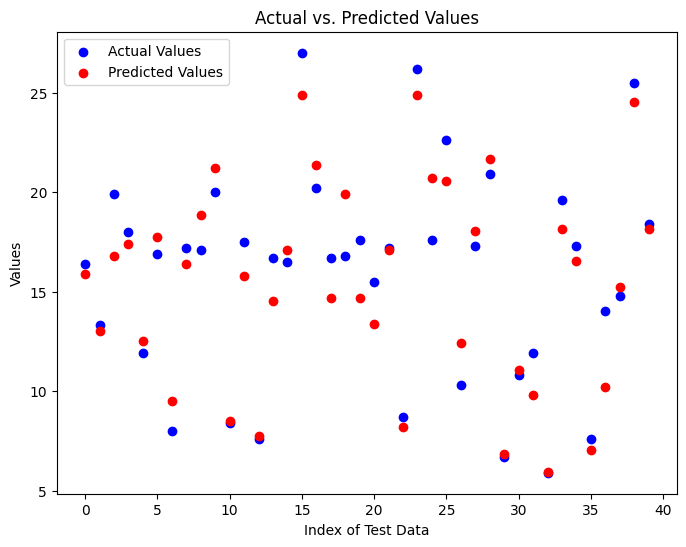

In [20]:
# @title Scatter plot
#!pip install matplotlib
import matplotlib.pyplot as plt
# Create figure
plt.figure(figsize=(8, 6))

# Plot Actual Values (Y_test) in Blue
plt.scatter(range(len(Y_test)), Y_test, color="blue", label="Actual Values")

# Plot Predicted Values (Y_pred) in Red
plt.scatter(range(len(Y_test_pred)), Y_test_pred, color="red", label="Predicted Values")

# Labels and Title
plt.xlabel("Index of Test Data")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values")
plt.legend()  # Show legend


# Show plot
plt.show()


***Save the results in Excel file***

In [ ]:
# Create DataFrames for training and testing data
train_data = pd.DataFrame({
    "Y_train": Y_train.values.ravel(),
    "Y_train_pred": Y_train_pred.ravel()
})

test_data = pd.DataFrame({
    "Y_test": Y_test.values.ravel(),
    "Y_test_pred": Y_test_pred.ravel()
})

# Save to an Excel file with two sheets
with pd.ExcelWriter("Results of Stepwise LR Model for Adverise data.xlsx") as writer:
    train_data.to_excel(writer, index=True, sheet_name="Training Data")
    test_data.to_excel(writer, index=True, sheet_name="Testing Data")

print("Excel file with separate sheets saved successfully.")

Excel file with separate sheets saved successfully.
